In [1]:
# import libs 

In [1]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

In [2]:
# Importing data 

In [3]:
#Trees

In [4]:
Trees = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Trees_in_study_site_lat_lon_a.shp')

In [5]:
Trees = Trees.to_crs(epsg=4326)

In [6]:
#This counts the trees 

In [7]:
Trees['tree_count'] = 1
Trees['ht_sq'] = Trees['h_t_mod']**2

In [8]:
#Import Geo 

In [9]:
#Buffers 

In [10]:
LVIS_5m = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\LVIS2_Gabon2016_5m.shp')


In [11]:
LVIS_10m = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\LVIS2_Gabon2016_10m.shp')

In [12]:
LVIS_125m = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\LVIS2_Gabon2016_125m.shp')

In [13]:
#Declare what buffer is being used 

In [14]:
#LVIS_shotsize has the geodata 

In [15]:
LVIS_shotsize = LVIS_5m

In [16]:
#LVIS_shotdata has the shot data 

In [17]:
LVIS_shotdata = LVIS_5m

In [18]:
#Changing CRS 
LVIS_shotsize = LVIS_shotsize.to_crs(epsg=4326)

In [19]:
area = ['SHOTNUMBER','geometry']

In [20]:
LVIS_shotsize = LVIS_shotsize[area]

In [21]:
LVIS_shotsize

,SHOTNUMBER,geometry
0,11689486,"POLYGON ((9.42289 0.61737, 9.42290 0.61737, 9...."
1,11689489,"POLYGON ((9.42289 0.61709, 9.42289 0.61709, 9...."
2,11689490,"POLYGON ((9.42289 0.61699, 9.42289 0.61699, 9...."
3,11689493,"POLYGON ((9.42288 0.61671, 9.42289 0.61671, 9...."
4,11689494,"POLYGON ((9.42288 0.61662, 9.42289 0.61662, 9...."
...,...,...
823,9911421,"POLYGON ((9.33029 0.54664, 9.33030 0.54664, 9...."
824,9911422,"POLYGON ((9.33029 0.54654, 9.33030 0.54654, 9...."
825,9911424,"POLYGON ((9.33029 0.54635, 9.33030 0.54635, 9...."
826,9911425,"POLYGON ((9.33030 0.54626, 9.33030 0.54626, 9...."


In [22]:
LVIS_shotsize['GeoArea'] = LVIS_shotsize['SHOTNUMBER']

In [23]:
## Bring in the Plots 

In [24]:
subplots0625 = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Plot-0_625ha.shp')

In [25]:
#Changing CRS 
subplots0625= subplots0625.to_crs(epsg=4326)

In [26]:
subplots0625['subplot'] = subplots0625['subplot'].astype(str)

In [27]:
subplots0625['GeoArea'] = subplots0625['plot'] + subplots0625['subplot']

In [28]:
subplots0625

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry,GeoArea
0,NASA01,1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,5.07,8.63,22,352,0.13,2.05,0.38,12.38,"POLYGON ((9.32193 0.55474, 9.32194 0.55497, 9....",NASA011
1,NASA01,10,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,81.39,150.04,23,368,0.99,15.77,0.47,26.57,"POLYGON ((9.32239 0.55495, 9.32239 0.55518, 9....",NASA0110
2,NASA01,11,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,29.57,49.24,30,480,0.43,6.88,0.54,17.62,"POLYGON ((9.32239 0.55518, 9.32240 0.55540, 9....",NASA0111
3,NASA01,12,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,2.07,4.06,14,224,0.05,0.85,0.44,11.17,"POLYGON ((9.32240 0.55540, 9.32241 0.55563, 9....",NASA0112
4,NASA01,13,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,91.22,181.01,33,528,1.32,21.16,0.42,26.20,"POLYGON ((9.32286 0.55561, 9.32285 0.55539, 9....",NASA0113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,NASA23,5,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,24.13,43.08,23,368,0.38,6.07,0.52,18.47,"POLYGON ((9.31622 0.54584, 9.31621 0.54561, 9....",NASA235
236,NASA23,6,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,76.27,120.98,63,1008,1.23,19.76,0.42,28.34,"POLYGON ((9.31621 0.54561, 9.31620 0.54539, 9....",NASA236
237,NASA23,7,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,175.54,301.28,43,688,2.02,32.37,0.49,30.04,"POLYGON ((9.31620 0.54539, 9.31619 0.54516, 9....",NASA237
238,NASA23,8,2016-02-01,TropRF,3096.26,25.64,Water,0.545369,9.316216,C,...,238.67,452.69,54,864,2.69,43.06,0.48,36.96,"POLYGON ((9.31619 0.54516, 9.31618 0.54493, 9....",NASA238


In [29]:
subplots025 = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Plot-0_25ha.shp')

In [30]:
subplots025= subplots025.to_crs(epsg=4326)

In [31]:
subplots025.columns

Index(['plot', 'subplot', 'date', 'vegetation', 'map', 'mat', 'pft_name',
       'latitude', 'longitude', 'p_origin', 'p_orientat', 'p_shape',
       'p_majoraxi', 'p_minoraxi', 'p_epsg', 'p_area', 'p_mindiam', 'sp_ix',
       'sp_iy', 'dft', 'agb', 'agb_valid', 'agb_lower', 'agb_upper', 'agbd_ha',
       'agbd_ha_lo', 'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba',
       'h_t_max', 'geometry'],
      dtype='object')

In [32]:
subplots025['subplot'] = subplots025['subplot'].astype(str)

In [33]:
subplots025['GeoArea'] = subplots025['plot'] + subplots025['subplot']

In [34]:
subplots1 = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Plot1ha_good.shp')

In [35]:
subplots1 = subplots1.to_crs(epsg=4326)

In [36]:
subplots1

,plot,ORIG_FID,Shape_Leng,Shape_Area,geometry
0,NASA01,1,399.999967,10000.002990,"POLYGON ((9.32283 0.55493, 9.32283 0.55471, 9...."
1,NASA02,2,399.999989,9999.998036,"POLYGON ((9.31901 0.55131, 9.31900 0.55108, 9...."
2,NASA03,3,399.999965,9999.998165,"POLYGON ((9.32513 0.54906, 9.32512 0.54883, 9...."
3,NASA05,4,399.999918,9999.995814,"POLYGON ((9.34282 0.56299, 9.34281 0.56276, 9...."
4,NASA09,5,400.000056,9999.999385,"POLYGON ((9.33030 0.54605, 9.33029 0.54582, 9...."
5,NASA10,6,400.000012,9999.998105,"POLYGON ((9.32390 0.54040, 9.32389 0.54017, 9...."
6,NASA11,7,400.000016,10000.000885,"POLYGON ((9.32025 0.53848, 9.32024 0.53825, 9...."
7,NASA13,8,399.999914,10000.003189,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
8,NASA14,9,400.000061,10000.003038,"POLYGON ((9.42253 0.58216, 9.42252 0.58194, 9...."
9,NASA19,10,400.000021,9999.998544,"POLYGON ((9.37615 0.57816, 9.37615 0.57793, 9...."


<AxesSubplot:>

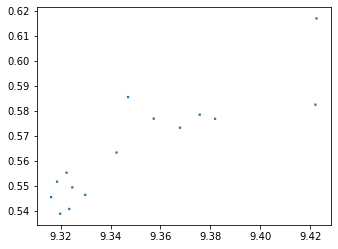

In [37]:
subplots1.plot()

In [38]:
subplots1 = subplots1.to_crs(epsg=4326)

In [39]:
subplots1 = subplots1['GeoArea'] = subplots1['plot'] 

In [40]:
plot = subplots0625

In [41]:
geo = LVIS_shotsize

In [42]:
#geo = plot

In [43]:
#The next step is counting the trees in a geo 

In [44]:
Trees 

,plot,subplot,tree_date,family,species,wsg,tree,stem,epsg,x,...,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,POINT_X,POINT_Y,geometry,tree_count,ht_sq
0,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,1,32632,535829.6805,...,12.18,0.119,1,1.65,37.92,9.322006,0.554795,POINT (9.32201 0.55479),1,148.3524
1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,1,32632,535827.8529,...,11.28,0.102,1,1.30,26.05,9.321989,0.554836,POINT (9.32199 0.55484),1,127.2384
2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,1,32632,535829.8895,...,11.66,0.109,1,1.30,30.62,9.322007,0.554844,POINT (9.32201 0.55484),1,135.9556
3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6504,1,32632,535829.9275,...,12.38,0.123,1,1.30,41.10,9.322008,0.554853,POINT (9.32201 0.55485),1,153.2644
4,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6505,1,32632,535828.8142,...,11.66,0.109,1,1.30,30.62,9.321998,0.554827,POINT (9.32200 0.55483),1,135.9556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6627,NASA23,14,2016-02-21,NA,NA,0.534143,3903,1,32632,535219.8031,...,26.15,0.557,1,1.60,2257.42,9.316524,0.545561,POINT (9.31652 0.54556),1,683.8225
6628,NASA23,14,2016-02-21,NA,NA,0.534143,3904,1,32632,535218.8324,...,26.59,0.576,1,1.30,2449.56,9.316515,0.545568,POINT (9.31652 0.54557),1,707.0281
6629,NASA23,14,2016-02-21,Myristicaceae,Pycnanthus angolensis,0.408900,3905,1,32632,535217.8426,...,14.45,0.168,1,1.30,93.90,9.316506,0.545571,POINT (9.31651 0.54557),1,208.8025
6630,NASA23,14,2016-02-21,Melastomataceae,Dichaetanthera sp.,0.609414,3906,1,32632,535223.8954,...,11.87,0.113,1,1.60,52.77,9.316561,0.545582,POINT (9.31656 0.54558),1,140.8969


In [45]:
Trees = Trees.to_crs(epsg=4326)

In [46]:
trees_in_geo = gpd.overlay(Trees, geo, how = 'intersection')

In [47]:
##Adding shots 

In [48]:
LVIS_shotdata.head(3)

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X,POINT_Y,BUFF_DIST,ORIG_FID,Shape_Leng,Shape_Area,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,1,1,1,9.422888,0.617327,5.0,0,0.000283,6.348654e-09,"POLYGON ((9.42289 0.61737, 9.42290 0.61737, 9...."
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,1,1,1,9.422886,0.617044,5.0,1,0.000283,6.348654e-09,"POLYGON ((9.42289 0.61709, 9.42289 0.61709, 9...."
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,1,1,1,9.422886,0.616949,5.0,2,0.000283,6.348656e-09,"POLYGON ((9.42289 0.61699, 9.42289 0.61699, 9...."


In [49]:
LVIS_shotdata= LVIS_shotdata.to_crs(epsg=4326)

In [50]:
LVIS_shotdata.columns

Index(['LFID', 'SHOTNUMBER', 'TIME', 'GLON', 'GLAT', 'ZG', 'HLON', 'HLAT',
       'ZH', 'TLON', 'TLAT', 'ZT', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100',
       'AZIMUTH', 'INCIDENTAN', 'RANGE', 'COMPLEXITY', 'CHANNEL_L1',
       'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X', 'POINT_Y', 'BUFF_DIST',
       'ORIG_FID', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [51]:
trees_in_geo_shot = gpd.overlay(trees_in_geo,LVIS_shotdata, how = 'intersection')

In [52]:
trees_in_geo_shot.columns

Index(['plot', 'subplot', 'tree_date', 'family', 'species', 'wsg', 'tree',
       'stem', 'epsg', 'x', 'y', 'status', 'allom_key', 'a_stem', 'h_t',
       'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht', 'm_agb', 'POINT_X_1',
       'POINT_Y_1', 'tree_count', 'ht_sq', 'SHOTNUMBER_1', 'GeoArea', 'LFID',
       'SHOTNUMBER_2', 'TIME', 'GLON', 'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH',
       'TLON', 'TLAT', 'ZT', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35',
       'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80',
       'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100',
       'AZIMUTH', 'INCIDENTAN', 'RANGE', 'COMPLEXITY', 'CHANNEL_L1',
       'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_2', 'POINT_Y_2', 'BUFF_DIST',
       'ORIG_FID', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [53]:
#Could you ass RSE and correlation coefficient to each plot? relative standard error (RSE) 

In [54]:
trees_in_geo_shot['Canopy_Profile1'] = (trees_in_geo_shot['ht_sq'] / trees_in_geo_shot['tree_count'] )**.5

In [55]:
RSE = ['GeoArea', 'Canopy_Profile1']

In [56]:
trees_in_geo_shot_RSE = trees_in_geo_shot[RSE]

In [57]:
trees_in_geo_shot_RSE_d = trees_in_geo_shot_RSE.groupby(['GeoArea']).sem()

In [58]:
trees_in_geo_shot_RSE_d.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_shot_RSE_d.csv')

In [59]:
trees_in_geo_shot_RSE_d =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_shot_RSE_d.csv')

In [60]:
trees_in_geo_shot_RSE_d.columns

Index(['GeoArea', 'Canopy_Profile1'], dtype='object')

In [61]:
trees_in_geo_shot_RSE.columns = ['GeoArea', 'RSE']

In [62]:
trees_in_geo_shot_RSE= trees_in_geo_shot_RSE.groupby(by='GeoArea').max()

In [63]:
trees_in_geo_shot_RSE['RSE'] = trees_in_geo_shot_RSE['RSE'].fillna(0)

In [64]:
trees_in_geo_shot_RSE

,RSE
GeoArea,
9361768,16.32
9361769,15.27
9361773,18.90
9361774,19.06
9361936,18.73
...,...
11689933,9.23
11689984,11.17
11690158,10.31


In [65]:
trees_in_geo_shot_RSE.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_shot_RSE.csv')

In [66]:
trees_in_geo_shot_RSE =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_shot_RSE.csv')

In [67]:
#correlation coefficient

In [68]:
spearmanr = ['GeoArea', 'Canopy_Profile1', 'm_agb']

In [69]:
trees_in_geo_shot_corr = trees_in_geo_shot[spearmanr]

In [70]:
trees_in_geo_shot_corr

,GeoArea,Canopy_Profile1,m_agb
0,9902820,10.60,12.35
1,9902820,10.31,16.71
2,9902820,10.13,18.64
3,9903268,10.43,24.71
4,9903491,11.61,30.07
...,...,...,...
3219,9897120,10.31,23.19
3220,9897120,10.31,23.19
3221,9897120,18.83,501.96
3222,9897120,26.15,2257.42


In [71]:
trees_in_geo_shot_corr_d = trees_in_geo_shot_corr.groupby('GeoArea')[['Canopy_Profile1', 'm_agb']].corr().iloc[0::2][['m_agb']]

In [72]:
trees_in_geo_shot_corr_d.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_shot_corr_d.csv')

In [73]:
trees_in_geo_shot_corr_d =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_shot_corr_d.csv')

In [74]:
trees_in_geo_shot_corr_d

,GeoArea,Unnamed: 1,m_agb
0,9361768,Canopy_Profile1,0.970428
1,9361769,Canopy_Profile1,0.917339
2,9361773,Canopy_Profile1,1.000000
3,9361774,Canopy_Profile1,0.992166
4,9361936,Canopy_Profile1,0.999992
...,...,...,...
558,11689933,Canopy_Profile1,NaN
559,11689984,Canopy_Profile1,NaN
560,11690158,Canopy_Profile1,1.000000
561,11690205,Canopy_Profile1,0.995169


In [75]:
trees_in_geo_shot_corr_d.columns

Index(['GeoArea', 'Unnamed: 1', 'm_agb'], dtype='object')

In [76]:
trees_in_geo_shot_corr_d= trees_in_geo_shot_corr_d.drop(columns='Unnamed: 1')

In [77]:
trees_in_geo_shot_corr_d.columns = ['GeoArea', 'CC']

In [78]:
trees_in_geo_shot_corr_d = trees_in_geo_shot_corr_d.groupby(by='GeoArea').max()

In [79]:
trees_in_geo_shot_corr_d

,CC
GeoArea,
9361768,0.970428
9361769,0.917339
9361773,1.000000
9361774,0.992166
9361936,0.999992
...,...
11689933,NaN
11689984,NaN
11690158,1.000000


In [80]:
trees_in_geo_shot_corr_d['CC'] = trees_in_geo_shot_corr_d['CC'].fillna(0)

In [81]:
trees_in_geo_shot_corr_d

,CC
GeoArea,
9361768,0.970428
9361769,0.917339
9361773,1.000000
9361774,0.992166
9361936,0.999992
...,...
11689933,0.000000
11689984,0.000000
11690158,1.000000


In [82]:
trees_in_geo_shot_corr_d.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_shot_corr_d.csv')

In [83]:
trees_in_geo_shot_corr_d =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_shot_corr_d.csv')

In [84]:
#Join STATs 
#trees_in_geo =  trees_in_geo.set_index('GeoArea').join(trees_in_geo_mean.set_index('GeoArea')) 

In [85]:
#trees_in_stat = trees_in_geo_shot_corr_d.set_index('GeoArea').join(trees_in_geo_shot_RSE.set_index('GeoArea')) 

In [86]:
#SUM

In [87]:
sum = ['GeoArea', 'm_agb','h_t_mod','tree_count','ht_sq']

In [88]:
trees_in_geo_sum = trees_in_geo_shot[sum]

In [89]:
trees_in_geo_sum = trees_in_geo_sum.groupby(by='GeoArea').sum()

In [90]:
trees_in_geo_sum

,m_agb,h_t_mod,tree_count,ht_sq
GeoArea,,,,
9361768,288.92,74.00,6,934.9222
9361769,908.16,191.79,16,2352.9337
9361773,753.15,36.21,2,656.8461
9361774,1016.30,76.68,5,1205.2976
9361936,523.66,42.10,3,623.8926
...,...,...,...,...
11689933,13.47,9.23,1,85.1929
11689984,38.51,11.17,1,124.7689
11690158,18.06,18.24,2,169.1810


In [91]:
trees_in_geo_sum.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_sum.csv')

In [92]:
trees_in_geo_sum =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_sum.csv')

In [93]:
trees_in_geo_sum.columns = ['GeoArea', 'm_agb_sum', 'h_t_mod_sum', 'tree_count_sum', 'ht_sq_sum']

In [94]:
#MEAN

In [95]:
mean = ['GeoArea','h_t_mod','ht_sq']

In [96]:
 trees_in_geo =  trees_in_geo_shot[mean]

In [97]:
 trees_in_geo_mean=  trees_in_geo.groupby(by='GeoArea').mean()

In [98]:
trees_in_geo_mean.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_mean.csv')

In [99]:
trees_in_geo_mean =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_mean.csv')

In [100]:
trees_in_geo_mean.columns = ['GeoArea','h_t_mod_mean','ht_sq_mean']

In [101]:
trees_in_geo_mean

,GeoArea,h_t_mod_mean,ht_sq_mean
0,9361768,12.333333,155.820367
1,9361769,11.986875,147.058356
2,9361773,18.105000,328.423050
3,9361774,15.336000,241.059520
4,9361936,14.033333,207.964200
...,...,...,...
558,11689933,9.230000,85.192900
559,11689984,11.170000,124.768900
560,11690158,9.120000,84.590500
561,11690205,12.040000,145.466050


In [102]:
#MAX 

In [103]:
max = ['GeoArea','RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100','h_t_mod']

In [104]:
 trees_in_geo = trees_in_geo_shot[max]

In [105]:
 trees_in_geo_max=   trees_in_geo.groupby(by='GeoArea').max()

In [106]:
trees_in_geo_max.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_max.csv')

In [107]:
trees_in_geo_max =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo_max.csv')

In [108]:
trees_in_geo_max.columns = ['GeoArea','RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100','h_t_modmax']

In [109]:
#Join Sum and MAX 


In [110]:
trees_in_geo = trees_in_geo_max.set_index('GeoArea').join(trees_in_geo_sum.set_index('GeoArea'))

In [111]:
trees_in_geo.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo.csv')

In [112]:
trees_in_geo =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo.csv')

In [113]:
#Join MEAN

In [114]:
trees_in_geo =  trees_in_geo.set_index('GeoArea').join(trees_in_geo_mean.set_index('GeoArea')) 

In [115]:
trees_in_geo

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH98,RH99,RH100,h_t_modmax,m_agb_sum,h_t_mod_sum,tree_count_sum,ht_sq_sum,h_t_mod_mean,ht_sq_mean
GeoArea,,,,,,,,,,,,,,,,,,,,,
9361768,5.46,7.34,8.53,9.43,10.11,10.70,11.30,11.98,12.73,13.47,...,20.51,21.03,22.08,16.32,288.92,74.00,6,934.9222,12.333333,155.820367
9361769,3.60,5.39,6.37,7.04,7.57,8.09,8.61,9.06,9.51,9.96,...,15.43,16.62,19.24,15.27,908.16,191.79,16,2352.9337,11.986875,147.058356
9361773,-1.28,-0.83,-0.45,-0.08,0.30,0.67,1.12,1.79,2.77,3.67,...,17.59,19.02,20.96,18.90,753.15,36.21,2,656.8461,18.105000,328.423050
9361774,-1.42,-1.05,-0.75,-0.52,-0.30,-0.08,0.15,0.37,0.60,0.90,...,11.53,12.88,15.20,19.06,1016.30,76.68,5,1205.2976,15.336000,241.059520
9361936,2.02,3.52,4.64,5.91,7.26,8.98,10.56,12.05,13.48,14.45,...,21.56,22.76,25.16,18.73,523.66,42.10,3,623.8926,14.033333,207.964200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11689933,-1.42,-1.19,-0.97,-0.82,-0.67,-0.52,-0.37,-0.22,-0.14,0.01,...,3.75,4.35,5.40,9.23,13.47,9.23,1,85.1929,9.230000,85.192900
11689984,-1.72,-1.35,-1.12,-0.90,-0.75,-0.60,-0.45,-0.30,-0.15,0.00,...,1.80,1.95,2.25,11.17,38.51,11.17,1,124.7689,11.170000,124.768900
11690158,-1.87,-1.49,-1.20,-0.97,-0.82,-0.67,-0.52,-0.37,-0.22,-0.07,...,1.88,2.03,2.40,10.31,18.06,18.24,2,169.1810,9.120000,84.590500


In [116]:
trees_in_geo.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo.csv')

In [117]:
trees_in_geo =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo.csv')

In [118]:
#Join CC 

In [119]:
trees_in_geo_shot_corr_d

,GeoArea,CC
0,9361768,0.970428
1,9361769,0.917339
2,9361773,1.000000
3,9361774,0.992166
4,9361936,0.999992
...,...,...
558,11689933,0.000000
559,11689984,0.000000
560,11690158,1.000000
561,11690205,0.995169


In [120]:
trees_in_geo =  trees_in_geo.set_index('GeoArea').join(trees_in_geo_shot_corr_d.set_index('GeoArea')) 

In [121]:
trees_in_geo

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH99,RH100,h_t_modmax,m_agb_sum,h_t_mod_sum,tree_count_sum,ht_sq_sum,h_t_mod_mean,ht_sq_mean,CC
GeoArea,,,,,,,,,,,,,,,,,,,,,
9361768,5.46,7.34,8.53,9.43,10.11,10.70,11.30,11.98,12.73,13.47,...,21.03,22.08,16.32,288.92,74.00,6,934.9222,12.333333,155.820367,0.970428
9361769,3.60,5.39,6.37,7.04,7.57,8.09,8.61,9.06,9.51,9.96,...,16.62,19.24,15.27,908.16,191.79,16,2352.9337,11.986875,147.058356,0.917339
9361773,-1.28,-0.83,-0.45,-0.08,0.30,0.67,1.12,1.79,2.77,3.67,...,19.02,20.96,18.90,753.15,36.21,2,656.8461,18.105000,328.423050,1.000000
9361774,-1.42,-1.05,-0.75,-0.52,-0.30,-0.08,0.15,0.37,0.60,0.90,...,12.88,15.20,19.06,1016.30,76.68,5,1205.2976,15.336000,241.059520,0.992166
9361936,2.02,3.52,4.64,5.91,7.26,8.98,10.56,12.05,13.48,14.45,...,22.76,25.16,18.73,523.66,42.10,3,623.8926,14.033333,207.964200,0.999992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11689933,-1.42,-1.19,-0.97,-0.82,-0.67,-0.52,-0.37,-0.22,-0.14,0.01,...,4.35,5.40,9.23,13.47,9.23,1,85.1929,9.230000,85.192900,0.000000
11689984,-1.72,-1.35,-1.12,-0.90,-0.75,-0.60,-0.45,-0.30,-0.15,0.00,...,1.95,2.25,11.17,38.51,11.17,1,124.7689,11.170000,124.768900,0.000000
11690158,-1.87,-1.49,-1.20,-0.97,-0.82,-0.67,-0.52,-0.37,-0.22,-0.07,...,2.03,2.40,10.31,18.06,18.24,2,169.1810,9.120000,84.590500,1.000000


In [122]:
trees_in_geo.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo.csv')

In [123]:
trees_in_geo =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo.csv')

In [124]:
#Join RSE 

In [125]:
trees_in_geo_shot_RSE 

,GeoArea,RSE
0,9361768,16.32
1,9361769,15.27
2,9361773,18.90
3,9361774,19.06
4,9361936,18.73
...,...,...
558,11689933,9.23
559,11689984,11.17
560,11690158,10.31
561,11690205,13.15


In [126]:
trees_in_geo =  trees_in_geo.set_index('GeoArea').join(trees_in_geo_shot_RSE .set_index('GeoArea')) 

In [127]:
trees_in_geo

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH100,h_t_modmax,m_agb_sum,h_t_mod_sum,tree_count_sum,ht_sq_sum,h_t_mod_mean,ht_sq_mean,CC,RSE
GeoArea,,,,,,,,,,,,,,,,,,,,,
9361768,5.46,7.34,8.53,9.43,10.11,10.70,11.30,11.98,12.73,13.47,...,22.08,16.32,288.92,74.00,6,934.9222,12.333333,155.820367,0.970428,16.32
9361769,3.60,5.39,6.37,7.04,7.57,8.09,8.61,9.06,9.51,9.96,...,19.24,15.27,908.16,191.79,16,2352.9337,11.986875,147.058356,0.917339,15.27
9361773,-1.28,-0.83,-0.45,-0.08,0.30,0.67,1.12,1.79,2.77,3.67,...,20.96,18.90,753.15,36.21,2,656.8461,18.105000,328.423050,1.000000,18.90
9361774,-1.42,-1.05,-0.75,-0.52,-0.30,-0.08,0.15,0.37,0.60,0.90,...,15.20,19.06,1016.30,76.68,5,1205.2976,15.336000,241.059520,0.992166,19.06
9361936,2.02,3.52,4.64,5.91,7.26,8.98,10.56,12.05,13.48,14.45,...,25.16,18.73,523.66,42.10,3,623.8926,14.033333,207.964200,0.999992,18.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11689933,-1.42,-1.19,-0.97,-0.82,-0.67,-0.52,-0.37,-0.22,-0.14,0.01,...,5.40,9.23,13.47,9.23,1,85.1929,9.230000,85.192900,0.000000,9.23
11689984,-1.72,-1.35,-1.12,-0.90,-0.75,-0.60,-0.45,-0.30,-0.15,0.00,...,2.25,11.17,38.51,11.17,1,124.7689,11.170000,124.768900,0.000000,11.17
11690158,-1.87,-1.49,-1.20,-0.97,-0.82,-0.67,-0.52,-0.37,-0.22,-0.07,...,2.40,10.31,18.06,18.24,2,169.1810,9.120000,84.590500,1.000000,10.31


In [128]:
trees_in_geo.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo.csv')

In [129]:
trees_in_geo =pd.read_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\trees_in_geo.csv')

In [130]:
trees_in_geo['Canopy_Profile'] = (trees_in_geo['ht_sq_sum'] / trees_in_geo['tree_count_sum'] )**.5

<AxesSubplot:xlabel='Canopy_Profile', ylabel='m_agb_sum'>

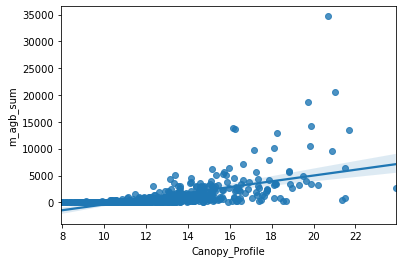

In [131]:
trees_in_geo = trees_in_geo[( trees_in_geo['m_agb_sum'] < 40000)]
sns.regplot(x='Canopy_Profile', y='m_agb_sum', data= trees_in_geo)

In [132]:
X = trees_in_geo['m_agb_sum']
y = trees_in_geo["RH100"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RH100   R-squared (uncentered):                   0.237
Model:                            OLS   Adj. R-squared (uncentered):              0.236
Method:                 Least Squares   F-statistic:                              174.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                    6.56e-35
Time:                        19:43:31   Log-Likelihood:                         -2561.9
No. Observations:                 562   AIC:                                      5126.
Df Residuals:                     561   BIC:                                      5130.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m_agb_sum      0.0045      0.000     13.216      0.000       0.004       0.005
==============================================================================
Omnibus:                      356.260   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7996.481
Skew:                          -2.375   Prob(JB):                         0.00
Kurtosis:                      20.858   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
def Helloword():
        print ("Hello world")

In [16]:
Helloword()

Hello world


In [19]:
def Greeting(name):
    print("Hi" + name + "I")

In [21]:
Greeting("Bob")


HiBobI


In [23]:
def Add(num1, num2):
    print(num1 + num2)

In [24]:
Add(11,22)

33


In [ ]:
def sum():
    